In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

In [56]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_depression/Dataset.csv')
data = data.drop(['Timestamp'], axis=1)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [57]:
data.columns = ['year', 'feeling', 'feeling_scale', 'gender', 'age', 'location',
              'relation', 'fin_state', 'cope', 'fam_understanding', 'pressure', 'result', 'living_place',
              'support', 'social_media', 'inferiority', 'meal', 'sick', 'hobby', 'sleep']
data.head()

,year,feeling,feeling_scale,gender,age,location,relation,fin_state,cope,fam_understanding,pressure,result,living_place,support,social_media,inferiority,meal,sick,hobby,sleep
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [4]:
dataset_encoded=data.iloc[:,0:20]

encoder=LabelEncoder()

for i in dataset_encoded:
    dataset_encoded[i]=encoder.fit_transform(dataset_encoded[i].astype(str))

dataset_encoded

,year,feeling,feeling_scale,gender,age,location,relation,fin_state,cope,fam_understanding,pressure,result,living_place,support,social_media,inferiority,meal,sick,hobby,sleep
0,0,2,46,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,5
1,0,2,35,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,5
2,0,0,46,0,0,2,0,1,3,2,1,1,0,0,0,1,2,0,0,5
3,0,2,40,0,0,2,0,1,3,2,0,1,0,0,0,1,2,0,0,5
4,0,2,46,0,0,2,0,1,3,2,1,1,1,0,0,1,2,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,2,59,0,0,3,0,1,4,2,0,0,0,1,0,0,2,0,0,6
700,0,4,90,0,0,3,0,1,4,2,0,0,1,0,0,1,0,0,1,7
701,0,4,92,0,0,1,0,1,4,2,0,1,1,0,0,1,2,0,0,6
702,0,4,99,0,0,3,0,1,3,1,0,1,1,1,0,1,2,0,1,0


In [105]:
feature_cols = ['feeling_scale', 'relation', 'fin_state', 'cope', 'pressure' ,'fam_understanding','result', 'support', 'social_media', 'inferiority', 'sleep']
X = dataset_encoded[feature_cols]          # Features
y = dataset_encoded.feeling              # Target variable

one_hot = pd.get_dummies(y)
one_hot.shape

(704, 5)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot, test_size=0.3, random_state=1)

In [107]:
X_train.shape

(492, 11)

In [108]:
y_train.shape

(492, 5)

# Developing Neural Network

In [109]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [164]:
model = Sequential()
model.add(Dense(12, input_dim=11, activation="relu"))

model.add(Dense(8,  activation="relu"))
model.add(Dense(8,  activation="relu"))

model.add(Dense(5, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 45        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [165]:
model_result = model.fit(X_train, y_train, epochs= 40, validation_split=0.3)

Epoch 1/40
11/11 [==============================] - 1s 22ms/step - loss: 4.8345 - accuracy: 0.1570 - val_loss: 4.3154 - val_accuracy: 0.1486
Epoch 2/40
11/11 [==============================] - 0s 6ms/step - loss: 3.7194 - accuracy: 0.1337 - val_loss: 3.6963 - val_accuracy: 0.1689
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 3.1316 - accuracy: 0.0756 - val_loss: 3.1858 - val_accuracy: 0.0270
Epoch 4/40
11/11 [==============================] - 0s 5ms/step - loss: 2.6991 - accuracy: 0.0843 - val_loss: 2.7259 - val_accuracy: 0.1216
Epoch 5/40
11/11 [==============================] - 0s 5ms/step - loss: 2.3853 - accuracy: 0.1105 - val_loss: 2.3842 - val_accuracy: 0.1149
Epoch 6/40
11/11 [==============================] - 0s 5ms/step - loss: 2.1382 - accuracy: 0.1105 - val_loss: 2.1496 - val_accuracy: 0.1014
Epoch 7/40
11/11 [==============================] - 0s 4ms/step - loss: 1.9617 - accuracy: 0.1221 - val_loss: 1.9787 - val_accuracy: 0.1689
Epoch 8/40
11/11 [=

In [166]:
accr = model.evaluate(X_train,y_train)
print('Train set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 0s 2ms/step - loss: 1.0943 - accuracy: 0.6098
Train set
  Loss: 1.094
  Accuracy: 0.610


In [167]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 0s 2ms/step - loss: 1.0957 - accuracy: 0.5802
Test set
  Loss: 1.096
  Accuracy: 0.580


# Ploting Data

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

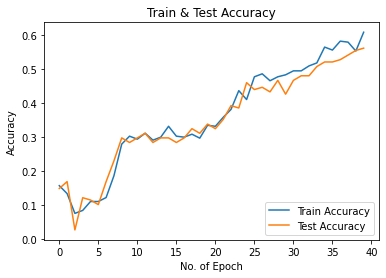

In [169]:
plt.plot(model_result.history['accuracy'], marker=None)
plt.plot(model_result.history['val_accuracy'], marker=None)
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title('Train & Test Accuracy')
plt.show()

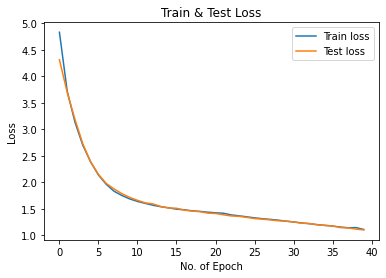

In [170]:
plt.plot(model_result.history['loss'], marker=None)
plt.plot(model_result.history['val_loss'], marker=None)
plt.xlabel('No. of Epoch')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.title('Train & Test Loss')
plt.show()